1.爬虫进行数据收集：海淀区世纪城1-20页数据

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common import NoSuchElementException, ElementClickInterceptedException
import pandas as pd
import os

In [10]:
#租房数据

# 初始化浏览器
driver = webdriver.Edge()
url = 'https://zu.fang.com/house-a015277-b03115/i32/'
driver.get(url)

# 初始化数据和路径
current_page = 1
max_pages = 20
data_list = []
save_path = r"C:\QuantEcon2025_RUC-main\MyProjects\rent_data.csv"  
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# 循环爬取
while current_page <= max_pages:
    try:
        house_items = driver.find_elements(By.CSS_SELECTOR, '[class="info rel"]')

        for item in house_items:
             # 从单个房源容器内提取数据
            price = item.find_element(By.CLASS_NAME, 'price').text
            size_info = item.find_element(By.CLASS_NAME, 'font15.mt12.bold').text.split('|')
            area = size_info[2].strip() if len(size_info) >=3 else "未知"
            
            data_list.append({
                "租金": price,
                "面积": area
            })
            
        if current_page >= max_pages:
            break
            
        # 翻页操作
        next_page = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable(
            (By.XPATH, "//div[@class='fanye']//a[contains(text(), '下一页')]")
        )
    )
        next_page.click()
        # 等待新页面加载
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'price'))
        )
        
        current_page += 1
        
    except NoSuchElementException:
        print("元素未找到，终止爬取")
        break
    except ElementClickInterceptedException:
        print("翻页按钮被遮挡，终止爬取")
        break
    except Exception as e:
        print(f"未知错误: {e}")
        break

# 保存数据到CSV
if data_list:
    df = pd.DataFrame(data_list)
    df.to_csv(save_path, index=False, encoding='utf_8_sig')  # 中文编码
    print(f"数据已保存至: {save_path}")
else:
    print("未提取到有效数据")

数据已保存至: C:\QuantEcon2025_RUC-main\MyProjects\rent_data.csv


In [34]:
#卖房数据

# 初始化浏览器
driver = webdriver.Edge()
url = 'https://esf.fang.com/house-a015277-b03115/'
driver.get(url)

# 初始化数据和路径
current_page = 1
max_pages = 20
data_list = []
save_path = r"C:\QuantEcon2025_RUC-main\MyProjects\house_data.csv"  
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# 循环爬取
while current_page <= max_pages:
    try:
        house_items = driver.find_elements(By.CSS_SELECTOR, 'dl[dataflag="bg"]')
        for item in house_items:
            # 提取价格数据
            price_info = item.find_element(By.CSS_SELECTOR, 'dd.price_right').text.split('\n')
            price = price_info[0].strip() if len(price_info) > 0 else "未知"
            unit_price = price_info[1].strip() if len(price_info) > 1 else "未知"
            
            
            # 提取面积数据
            size_info = item.find_element(By.CLASS_NAME, 'tel_shop').text.split('|')
            area = size_info[1].strip() if len(size_info) >= 2 else "未知"
            
            data_list.append({
                "总价": price,
                "单价": unit_price,
                "面积": area,
            })
        if current_page >= max_pages:
            break
            
        # 翻页操作
        next_page = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.CLASS_NAME, 'last'))
        )
        next_page.click()
        
        current_page += 1
        
    except NoSuchElementException:
        print("元素未找到，终止爬取")
        break
    except ElementClickInterceptedException:
        print("翻页按钮被遮挡，终止爬取")
        break
    except Exception as e:
        print(f"未知错误: {e}")
        break

# 保存数据到CSV
if data_list:
    df = pd.DataFrame(data_list)
    df.to_csv(save_path, index=False, encoding='utf_8_sig')  # 中文编码
    print(f"数据已保存至: {save_path}")
else:
    print("未提取到有效数据")




数据已保存至: C:\QuantEcon2025_RUC-main\MyProjects\house_data.csv


2.数据整合

In [17]:
#租房数据整合
import pandas as pd

# 文件路径及对应的地区名称
files_info = {
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\世纪城_rent_data.csv": "世纪城",
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\rent_data_万柳(1).xlsx": "万柳",
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\rental_info_苏州桥(2).csv": "苏州桥",
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\Rent_Beitaipingzhuang(1).csv": "北太平庄"
}

# 存储处理后的数据
dataframes = []

for file, region in files_info.items():
    if file.endswith(".csv"):
        try:
            df = pd.read_csv(file, encoding="gbk")  # 处理编码问题
        except UnicodeDecodeError:
            df = pd.read_csv(file, encoding="ISO-8859-1")  # 备用编码
    elif file.endswith(".xlsx"):
        df = pd.read_excel(file)
    else:
        continue
    
    # 统一列名
    df.columns = [f"{region}_面积", f"{region}_租金"]
    dataframes.append(df)

# 合并所有数据
merged_data = pd.concat(dataframes, axis=1)

# 存储
output_path = "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\group1_rent.csv"
merged_data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"合并后的数据已保存到: {output_path}")


合并后的数据已保存到: C:\QuantEcon2025_RUC-main\Homework\hw3\group1_rent.csv


In [19]:
#卖房数据整合
import pandas as pd

# 文件路径及对应的地区名称
files_info = {
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\世纪城_house_data.csv": "世纪城",
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\house_data_万柳(1).xlsx": "万柳",
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\resold_info_苏州桥(2).csv": "苏州桥",
    "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\Price_Beitaipingzhuang(1).csv": "北太平庄"
}

# 存储处理后的数据
dataframes = []

for file, region in files_info.items():
    if file.endswith(".csv"):
        try:
            df = pd.read_csv(file, encoding="gbk")  # 处理编码问题
        except UnicodeDecodeError:
            df = pd.read_csv(file, encoding="ISO-8859-1")  # 备用编码
    elif file.endswith(".xlsx"):
        df = pd.read_excel(file)
    else:
        continue
    
    # 统一列名
    df.columns = [f"{region}_单价", f"{region}_面积"]
    dataframes.append(df)

# 合并所有数据
merged_data = pd.concat(dataframes, axis=1)

# 存储
output_path = "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\group1_house.csv"
merged_data.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"合并后的数据已保存到: {output_path}")


合并后的数据已保存到: C:\QuantEcon2025_RUC-main\Homework\hw3\group1_house.csv


3.数据描述及离群值判断

In [21]:
import pandas as pd

# 读取数据文件
def load_data(file_path):
    try:
        df = pd.read_csv(file_path, encoding="utf-8-sig")
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding="gbk")
    return df

# 计算描述性统计信息
def describe_data(df):
    return df.describe()

# 识别并剔除离群值（基于IQR方法）
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df < lower_bound) | (df > upper_bound)).sum()
    filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return filtered_df, outliers

# 处理租房数据
rent_file = "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\group1_rent.csv"
rent_data = load_data(rent_file)
print("租房数据描述性统计信息:")
print(describe_data(rent_data))
filtered_rent_data, rent_outliers = remove_outliers(rent_data)
print("租房数据离群值数量:")
print(rent_outliers)

# 处理买房数据
house_file = "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\group1_house.csv"
house_data = load_data(house_file)
print("买房数据描述性统计信息:")
print(describe_data(house_data))
filtered_house_data, house_outliers = remove_outliers(house_data)
print("买房数据离群值数量:")
print(house_outliers)

# 保存清理后的数据
filtered_rent_data.to_csv("C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\cleaned_group1_rent.csv", index=False, encoding='utf-8-sig')
filtered_house_data.to_csv("C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\cleaned_group1_house.csv", index=False, encoding='utf-8-sig')

print("清理后的数据已保存。")


租房数据描述性统计信息:
            世纪城_面积        世纪城_租金        万柳_面积          万柳_租金      苏州桥_面积  \
count  1140.000000   1140.000000   600.000000     600.000000  198.000000   
mean    157.468421  19949.868421   144.228333   27744.416667   56.212121   
std      46.090893  10074.845155   102.415711   29674.293378   24.758026   
min      38.000000   5400.000000    42.000000    5000.000000    6.000000   
25%     134.000000  14500.000000    78.000000   10000.000000   44.000000   
50%     165.000000  18000.000000   123.000000   18000.000000   60.000000   
75%     178.000000  23000.000000   177.000000   28000.000000   68.000000   
max     296.000000  59000.000000  1501.000000  160000.000000  151.000000   

             苏州桥_租金     北太平庄_面积       北太平庄_租金  
count    198.000000   53.000000     53.000000  
mean    8137.550505   59.509434   8509.433962  
std     3784.018650   23.906567   3520.503906  
min     2000.000000   20.000000   2800.000000  
25%     6200.000000   37.000000   5500.000000  
50%     7800.0

4.计算房价-租金中位数及图像绘制

各地区的房价租金比：
sjc: 房价租金比 = 1083.95
wl: 房价租金比 = 979.19
szq: 房价租金比 = 650.35
btpz: 房价租金比 = 629.12


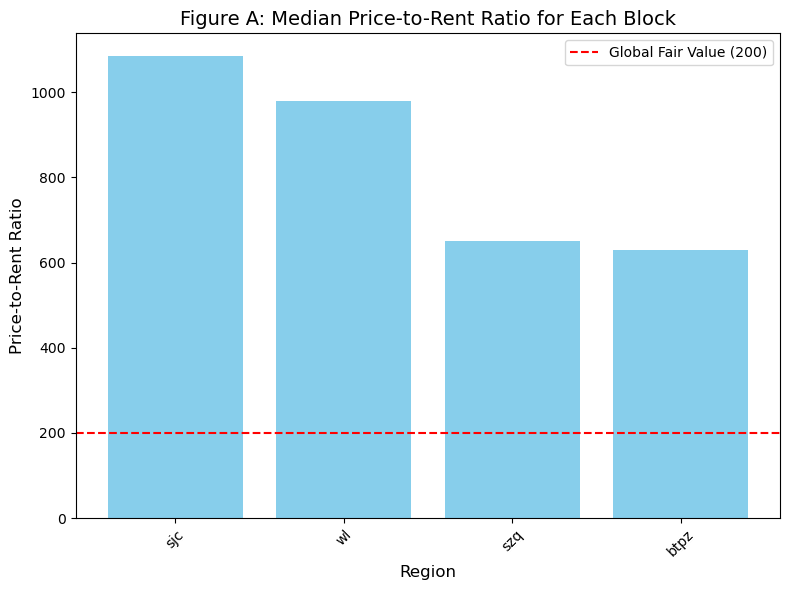

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件读取
rent_file = "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\group1_rent.csv"
house_file = "C:\\QuantEcon2025_RUC-main\\Homework\\hw3\\group1_house.csv"
rent_data = pd.read_csv(rent_file, encoding="utf-8-sig")
house_data = pd.read_csv(house_file, encoding="utf-8-sig")

# 计算每个地区的房价、单位租金中位数及房价租金比
regions = ["世纪城", "万柳", "苏州桥", "北太平庄"]
region_codes = ["sjc", "wl", "szq", "btpz"]  # 对应的简短地区名称
price_to_rent_ratios = {}

for i, region in enumerate(regions):
    # 计算单位租金（租金 ÷ 面积）的中位数
    per_sqm_rent_median = (rent_data[f"{region}_租金"] / rent_data[f"{region}_面积"]).median()
    price_median = house_data[f"{region}_单价"].median()
    
    if per_sqm_rent_median > 0:  # 避免除以零
        price_to_rent_ratio = price_median / per_sqm_rent_median
    else:
        price_to_rent_ratio = None  # 若单位租金中位数为0，则比率无法计算

    price_to_rent_ratios[region_codes[i]] = price_to_rent_ratio

# 输出结果
print("各地区的房价租金比：")
for region_code, ratio in price_to_rent_ratios.items():
    print(f"{region_code}: 房价租金比 = {ratio:.2f}" if ratio is not None else f"{region_code}: 无法计算房价租金比")

# 绘制房价租金比的柱状图
fig, ax = plt.subplots(figsize=(8, 6))

# 处理空值
valid_region_codes = [region_code for region_code, ratio in price_to_rent_ratios.items() if ratio is not None]
valid_ratios = [ratio for ratio in price_to_rent_ratios.values() if ratio is not None]

# 绘制柱状图
ax.bar(valid_region_codes, valid_ratios, color='skyblue')

# 添加标题和标签
ax.set_title("Figure A: Median Price-to-Rent Ratio for Each Block", fontsize=14)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Price-to-Rent Ratio", fontsize=12)

# 添加参考线
ax.axhline(200, color='r', linestyle='--', label="Global Fair Value (200)")

# 添加图例
ax.legend()

# 显示横坐标标签，避免重叠
plt.xticks(rotation=45)

# 调整图形布局
plt.tight_layout()

# 显示图形
plt.show()


5.模型代入预测

In [161]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import itertools

# 读取数据
house_data_path = r"C:\QuantEcon2025_RUC-main\Homework\hw3\group1_house.csv"
rent_data_path = r"C:\QuantEcon2025_RUC-main\Homework\hw3\group1_rent.csv"

df_house = pd.read_csv(house_data_path)
df_rent = pd.read_csv(rent_data_path)

regions = ['世纪城', '万柳', '苏州桥', '北太平庄']

# 处理房价数据
data_house = pd.concat([
    df_house.filter(like=region).rename(columns={
        f'{region}_单价': 'price',
        f'{region}_面积': 'size'
    }).assign(region=region)
    for region in regions
], ignore_index=True)

data_house['region'] = pd.Categorical(data_house['region'], categories=regions)
formula = "price ~ size * C(region)"
model_house = smf.ols(formula=formula, data=data_house).fit()

print("房价回归模型结果：")
print(model_house.summary())

# 生成正确的预测数据
predict_data_house = pd.DataFrame(itertools.product(regions, [50, 100]), columns=['region', 'size'])

# 调试：打印预测数据
print("预测数据（房价）：")
print(predict_data_house)

# 执行预测
predictions_house = model_house.get_prediction(predict_data_house)
pred_results_house = predictions_house.summary_frame(alpha=0.05)

# 调试：打印预测结果
print("预测结果数据框（房价）：")
print(pred_results_house)

result_table_price = pd.concat([
    predict_data_house.reset_index(drop=True),
    pred_results_house[['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper']]
], axis=1)

result_table_price.rename(columns={
    'mean': '预测单价',
    'mean_se': '标准误',
    'mean_ci_lower': '置信区间下限',
    'mean_ci_upper': '置信区间上限'
}, inplace=True)

print("\n单价预测结果（单位：元/平方米）：")
print(result_table_price.round(2).to_string(index=False))

# 处理租金数据
data_list = []
for region in regions:
    area_col = f'{region}_面积'
    rent_col = f'{region}_租金'
    temp_df = df_rent[[area_col, rent_col]].copy()
    temp_df.columns = ['size', 'rent']
    temp_df['rent_per_m2'] = temp_df['rent'] / temp_df['size']
    temp_df = temp_df.assign(region=region).dropna().query('size > 0')
    data_list.append(temp_df)

data_rent = pd.concat(data_list, ignore_index=True)
data_rent['region'] = pd.Categorical(data_rent['region'], categories=regions)
formula = "rent_per_m2 ~ size * C(region)"
model_rent = smf.ols(formula=formula, data=data_rent).fit()

print("租金回归模型结果：")
print(model_rent.summary())

# 生成正确的预测数据
predict_data_rent = pd.DataFrame(itertools.product(regions, [50, 100]), columns=['region', 'size'])

# 调试：打印预测数据
print("预测数据（租金）：")
print(predict_data_rent)

# 执行预测
predictions_rent = model_rent.get_prediction(predict_data_rent)
pred_results_rent = predictions_rent.summary_frame(alpha=0.05)

# 调试：打印预测结果
print("预测结果数据框（租金）：")
print(pred_results_rent)

result_table_rent = pd.concat([
    predict_data_rent.reset_index(drop=True),
    pred_results_rent[['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper']]
], axis=1)

result_table_rent.rename(columns={
    'mean': '预测单位租金（元/㎡）',
    'mean_se': '标准误',
    'mean_ci_lower': '置信下限',
    'mean_ci_upper': '置信上限'
}, inplace=True)

print("\n单位租金预测结果：")
print(result_table_rent.round(2).to_string(index=False))


房价回归模型结果：
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     283.2
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          8.51e-290
Time:                        20:33:20   Log-Likelihood:                -21973.
No. Observations:                1918   AIC:                         4.396e+04
Df Residuals:                    1910   BIC:                         4.401e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         


房价租金比预测结果：
region  size   房价租金比
   世纪城    50 1154.20
   世纪城   100 1070.12
    万柳    50  894.05
    万柳   100  883.06
   苏州桥    50  470.36
   苏州桥   100 1480.16
  北太平庄    50  567.43
  北太平庄   100  774.41


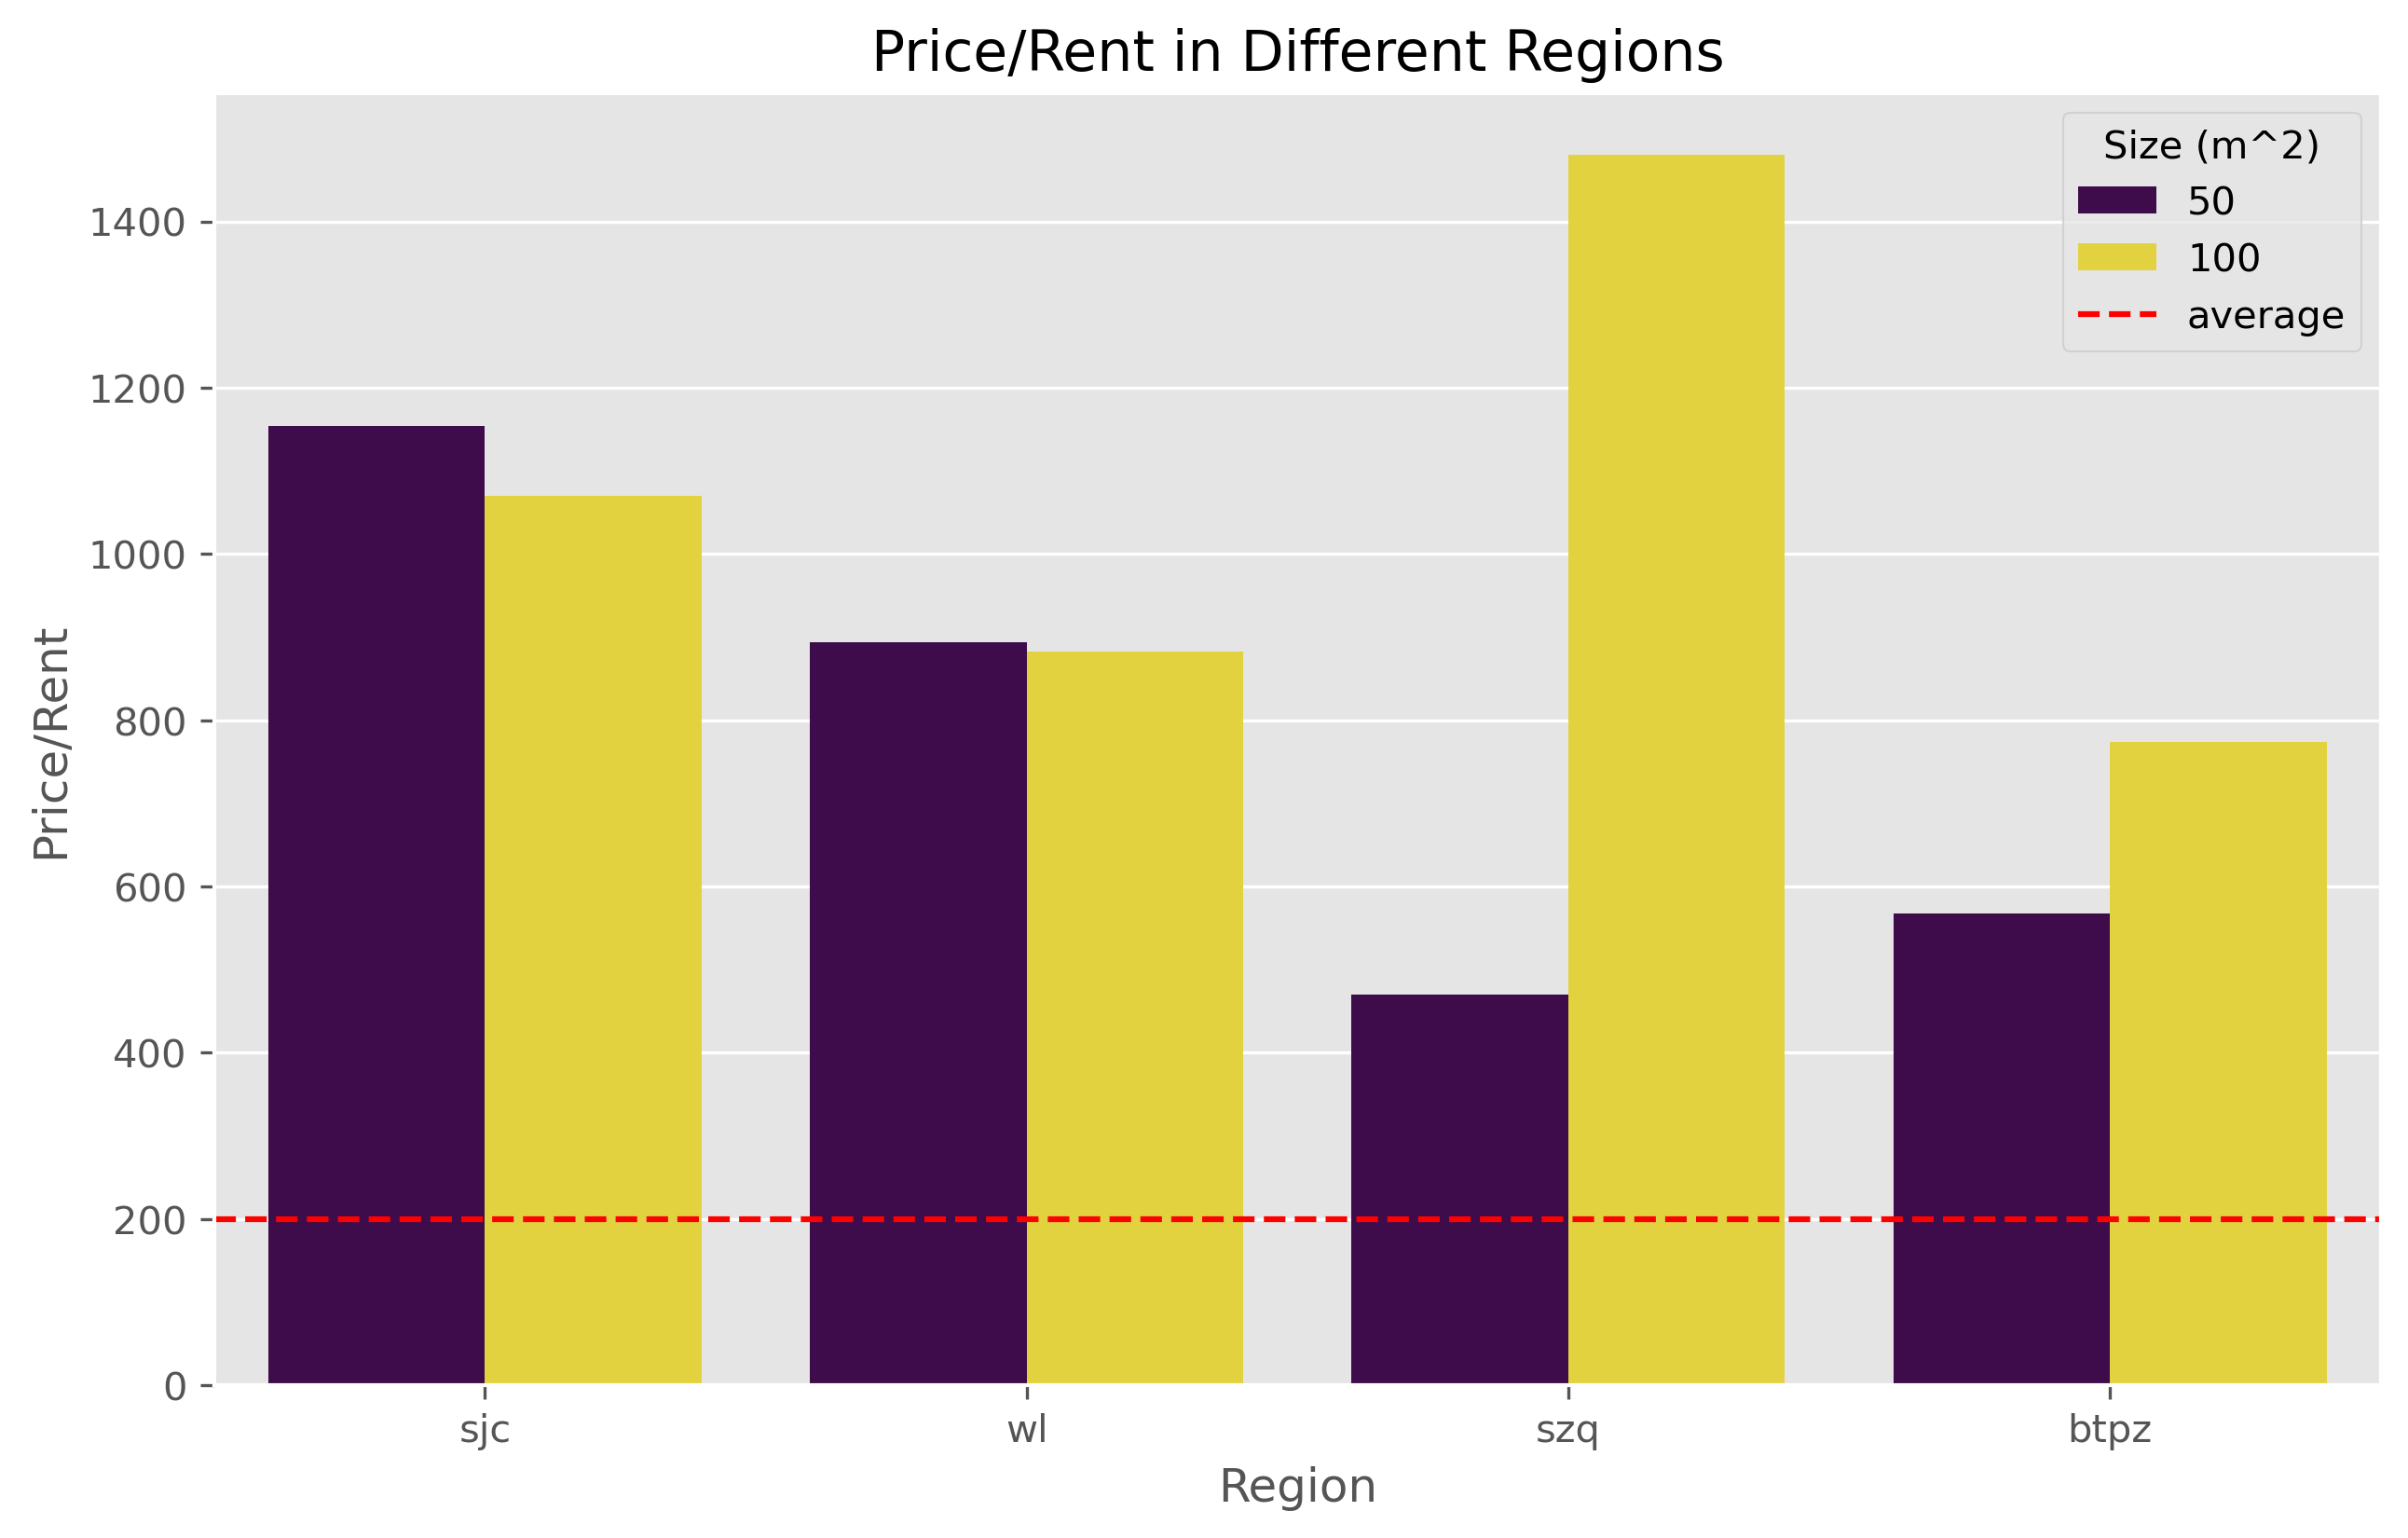

In [165]:
# 合并房价和租金预测数据
result_table = result_table_price[['region', 'size', '预测单价']].merge(
    result_table_rent[['region', 'size', '预测单位租金（元/㎡）']],
    on=['region', 'size']
)

# 计算房价租金比
result_table['房价租金比'] = result_table['预测单价'] / (result_table['预测单位租金（元/㎡）'] )

# 打印结果
print("\n房价租金比预测结果：")
print(result_table[['region', 'size', '房价租金比']].round(2).to_string(index=False))
# 绘制条形图
plt.figure(figsize=(10, 6))
sns.barplot(
    data=result_table,
    x='region',
    y='房价租金比',
    hue='size',
    palette='viridis'
)

# 横坐标
plt.axhline(200, color='red', linestyle='--', label='average')  # 20年租售比警戒线
plt.xlabel("Region")
plt.ylabel("Price/Rent")
plt.title("Price/Rent in Different Regions")

# 中文输出有问题，这里我选择简写英文
new_labels = ['sjc', 'wl', 'szq', 'btpz']  # 根据你的实际情况设置
plt.xticks(ticks=range(len(new_labels)), labels=new_labels)

plt.legend(title="Size (m^2)")
plt.show()
